<a href="https://colab.research.google.com/github/korziner/Academic-Supervisor-webui/blob/main/RVC_v2_by_https_www_youtube_com_ba1yya_(%D0%BE%D0%B1%D0%BD%D0%BE%D0%B2%D0%BB%D0%B5%D0%BD_01_09_2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[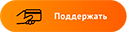](https://boosty.to/ba1yya)

In [ ]:
#@markdown #Откройте публичный URL, который появится ниже.
#@markdown Установите флажок для загрузки моделей из папки Google Drive RVC
import os, zipfile, shutil, tarfile
import ipywidgets as widgets
from IPython.display import clear_output
backup = {
        'hubert_base.pt':'https://drive.google.com/file/d/1tHNmjoSHJj7G2xX_Knz4zZ8Mg7g-VhAW/view?usp=sharing',
        'pretrained_v2/D40k.pth':'https://drive.google.com/file/d/1BJ3TKdn2xAK9VbV8UIDoo_9K4Yyfjs7-/view?usp=sharing -O pretrained_v2/D40k.pth',
        'pretrained_v2/G40k.pth':'https://drive.google.com/file/d/1BJ3TKdn2xAK9VbV8UIDoo_9K4Yyfjs7-/view?usp=sharing -O pretrained_v2/G40k.pth',
        'pretrained_v2/f0D40k.pth':'https://drive.google.com/file/d/1A33v5MT1L_-v4iP550ibl5givEqgDus1/view?usp=sharing -O pretrained_v2/f0D40k.pth',
        'pretrained_v2/f0G40k.pth':'https://drive.google.com/file/d/1mMEOosc4FO3QRhYxIhHr-GVCxF05tjwV/view?usp=sharing -O pretrained_v2/f0G40k.pth',
        'rmvpe.pt':'https://drive.google.com/file/d/1ABwfoHKBlUsyGIy-f_axaHM6vcXxZzQU/view?usp=drive_link'
}
def aria_backup(missing_file):
  url = backup[missing_file]
  !gdown --fuzzy $url
gdrive=True#@param {type:"boolean"}
tensorboard=False#@param {type:"boolean"}
f_key = 'WebUI'
e_key = 'E' + 'V' + 'C'
success=widgets.Button(description="\u2714 Успешно.",disabled=True, button_style="success")
if not "installed" in locals():
  !wget https://github.com/777gt/{e_key}/raw/main/wav2lip-HD.tar.gz
  !wget https://github.com/777gt/{e_key}/raw/main/wav2lip-cache.tar.gz
  import tarfile, os
  with tarfile.open('/content/wav2lip-cache.tar.gz', 'r:gz') as tar:
    for member in tar.getmembers():
      target_path = os.path.join('/', member.name)
      try:
        tar.extract(member, '/')
      except:
        pass
  with tarfile.open('/content/wav2lip-HD.tar.gz') as tar:
    tar.extractall('/content')
  if gdrive:
    from google.colab import drive
    drive.mount('/content/drive')
    if os.path.exists('/content/drive'):
      !mkdir -p /content/drive/MyDrive/RVC_Packages
      if not os.path.exists('/content/drive/MyDrive/RVC_Packages/Packages.tar.gz'):
        !wget https://github.com/777gt/{e_key}/raw/main/Packages.tar.gz -O /content/drive/MyDrive/RVC_Packages/Packages.tar.gz
      with tarfile.open('/content/drive/MyDrive/RVC_Packages/Packages.tar.gz', 'r:gz') as tar:
        for member in tar.getmembers():
          target_path = os.path.join('/', member.name)
          tar.extract(member, '/')
    else:
      !wget https://github.com/777gt/{e_key}/raw/main/Packages.tar.gz -O /content/Packages.tar.gz
      with tarfile.open('/content/Packages.tar.gz', 'r:gz') as tar:
        for member in tar.getmembers():
          target_path = os.path.join('/', member.name)
          tar.extract(member, '/')
  else:
    !wget https://github.com/777gt/{e_key}/raw/main/Packages.tar.gz -O /content/Packages.tar.gz
    with tarfile.open('/content/Packages.tar.gz', 'r:gz') as tar:
      for member in tar.getmembers():
        target_path = os.path.join('/', member.name)
        tar.extract(member, '/')
  !pip install -q gTTS torchcrepe
  !pip install gradio --upgrade
  %cd /content
  !git clone https://github.com/777gt/-EVC-
  %cd /content/-EVC-
  !wget https://huggingface.co/lj1995/VoiceConversion{f_key}/resolve/main/rmvpe.pt
  !wget https://huggingface.co/lj1995/VoiceConversion{f_key}/resolve/main/hubert_base.pt
  !wget https://huggingface.co/lj1995/VoiceConversion{f_key}/resolve/main/pretrained_v2/D40k.pth -O /content/-EVC-/pretrained_v2/D40k.pth
  !wget https://huggingface.co/lj1995/VoiceConversion{f_key}/resolve/main/pretrained_v2/G40k.pth -O /content/-EVC-/pretrained_v2/G40k.pth
  !wget https://huggingface.co/lj1995/VoiceConversion{f_key}/resolve/main/pretrained_v2/f0D40k.pth -O /content/-EVC-/pretrained_v2/f0D40k.pth
  !wget https://huggingface.co/lj1995/VoiceConversion{f_key}/resolve/main/pretrained_v2/f0G40k.pth -O /content/-EVC-/pretrained_v2/f0G40k.pth
  for file in list(backup.keys()):
    if not os.path.exists(file): aria_backup(file)
  installed=True
  os.remove("/content/-EVC-/GUI.py")
  !wget https://huggingface.co/datasets/Ba1yya/v2/resolve/main/GUI.py
  clear_output()
  display(success)
if gdrive:
  if os.path.exists('/content/drive/MyDrive/RVC'):
    %cd /content/drive/MyDrive/RVC
  else:
    !mkdir -p /content/drive/MyDrive/RVC
    %cd /content/drive/MyDrive/RVC
  !mkdir -p /content/unzips
  for file in os.listdir():
    if file.endswith('.zip'):
      file_name=file.split('.')[0]
      zip_path = f'/content/drive/MyDrive/RVC/{file}'
      with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        for member in zip_ref.infolist():
          if member.filename.endswith('.pth'):
            extraction_dir=f'/content/unzips/{file_name}'
            file_size = member.file_size
            if file_size < 100 * 1024 * 1024:
              with zip_ref.open(member) as file:
                if len(file.read()) < 100 * 1024 * 1024:
                  zip_ref.extract(member, path=extraction_dir)
                  !find /content/unzips/{file_name} -name '*.pth' -exec mv {{}} /content/-EVC-/weights/{file_name}.pth \;
          if member.filename.endswith('.index'):
            extraction_dir=f'/content/unzips/'
            with zip_ref.open(member) as file:
              zip_ref.extract(member, path=extraction_dir)
              !mkdir -p /content/-EVC-/logs/{file_name}
              os.chdir(f"/content/-EVC-/logs/{file_name}")
              !find /content/unzips -name *.index -exec mv {} . \;
if os.path.exists('/content/unzips'):
  shutil.rmtree('/content/unzips')
  pass
if tensorboard:
  %load_ext tensorboard
  %tensorboard --logdir /content/-EVC-/logs
%cd /content/-EVC-
!mkdir -p ./audios
!python3 GUI.py --colab --pycmd python3

In [ ]:
if not os.path.exists('/content/-EVC-'):
  print("Перед загрузкой модели необходимо запустить первую ячейку! Запустите графический интерфейс, остановите его, а затем загрузите модель.")
else:
  #@title Резервное копирование Google Drive (для возобновления обучения)
  Name = ""#@param {type:"string"}
  folder = Name
  Type = "Save" #@param ["Save", "Load"]
  import tarfile, os
  from google.colab import drive
  drive.mount('/content/drive')
  !mkdir -p /content/drive/MyDrive/RVC_Packages
  if Type=='Save':
    with tarfile.open(f'/content/drive/MyDrive/RVC_Packages/{folder}.tar.gz','w:gz') as tar:
      tar.add(f'/content/-EVC-/logs/{folder}', arcname=f'logs/{folder}')
      if os.path.exists(f'/content/-EVC-/weights/{folder}.pth'):
        tar.add(f'/content/-EVC-/weights/{folder}.pth', arcname=f'weights/{folder}.pth')
      print(f'Backed up {folder} to RVC_Packages in your google drive.')
  else:
    if not os.path.exists(f'/content/drive/MyDrive/RVC_Packages/{folder}.tar.gz'):
      print("File not found.")
    else:
      with tarfile.open(f'/content/drive/MyDrive/RVC_Packages/{folder}.tar.gz','r:gz') as tar:
        tar.extractall('/content/-EVC-')